epoch  W  b  cost
0 [-0.6886875] [0.33335245] [0.9312736] 4.540359
1 [-0.6479309] [0.39081743] [1.037229] 3.1278188
2 [-0.61428237] [0.43469638] [1.1143185] 2.3412206
3 [-0.5859371] [0.46849585] [1.1700292] 1.8986253
4 [-0.56155705] [0.49481463] [1.2099092] 1.6451782
5 [-0.54015046] [0.5155789] [1.2380706] 1.4958218
6 [-0.52098185] [0.5322162] [1.2575605] 1.4038378
7 [-0.5035058] [0.54578453] [1.2706369] 1.3435618
8 [-0.48731786] [0.55706817] [1.2789733] 1.3008946
9 [-0.4721178] [0.5666484] [1.2838097] 1.268089

=== Test ===
X: 5.0 Y: [-0.4721178   0.13215882  1.3783402   3.2664266   5.7964177   8.968313  ]
X: 2.5 Y: [-0.4721178   0.13215882  1.3783402   3.2664266   5.7964177   8.968313  ]


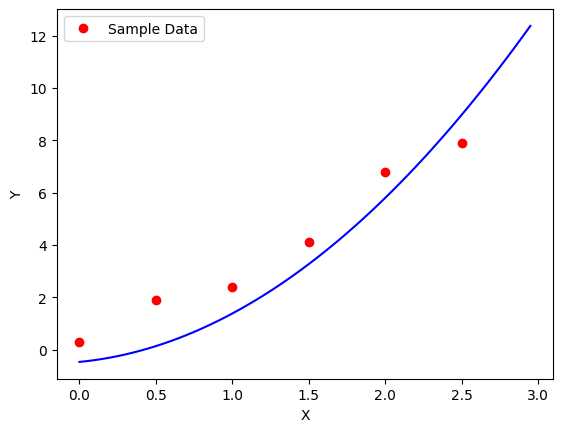

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# X 입력값
# Y X에 대해 예측된 y의 값
X = tf.constant([0, 0.5, 1.0, 1.5, 2.0, 2.5])
Y = tf.constant([0.3, 1.9, 2.4, 4.1, 6.8, 7.9])

# W, b를 -1.0 ~ 1.0 사이에 균등분포 갖는 Shape 1의 변수형 텐서로 설정
a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행


optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.optimizers.Adam(learning_rate=0.07, beta_1=0.9, beta_20.999, epsilon=1e-08, amsgrad=False, name='Adam')
# optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 비용 함수 계산
@tf.function()
def cost_eval():
  # y = a0+a1*x+a2*x^2
  # W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용
  hypothesis = a0+a1*X+(a2*(X**2))
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  W  b  cost")
# 최적화를 10번 수행
for epoch in range(0, 10, 1):

  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list=[a0,a1,a2])
  # 손실, 가중치, 편향을 출력
  # numpy() 함수는 변수의 배열만 출력
  print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.

print("\n=== Test ===")
x=5.
print('X:', x, 'Y:', (a0+a1*X+(a2*(X**2))).numpy())
x=2.5
print('X:', x, 'Y:', (a0+a1*X+(a2*(X**2))).numpy())


#그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(0,3,0.05)

#선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a0+a1*new_X+(a2*(new_X**2))


#화면에 그래프로 그리기
plt.plot(X,Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


tf.Tensor([-0.2693449   0.11995614  0.50925714], shape=(3,), dtype=float32)


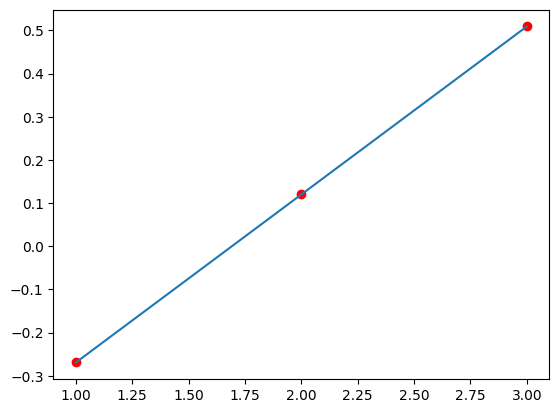

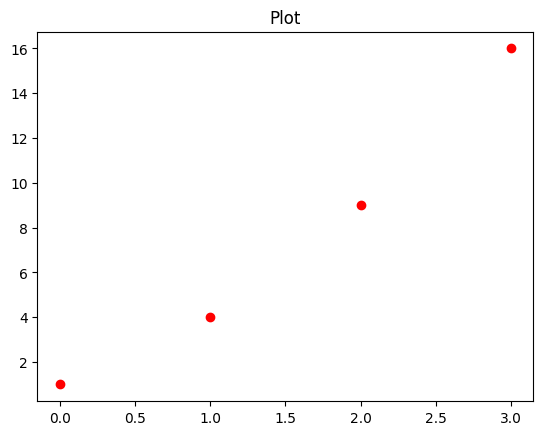

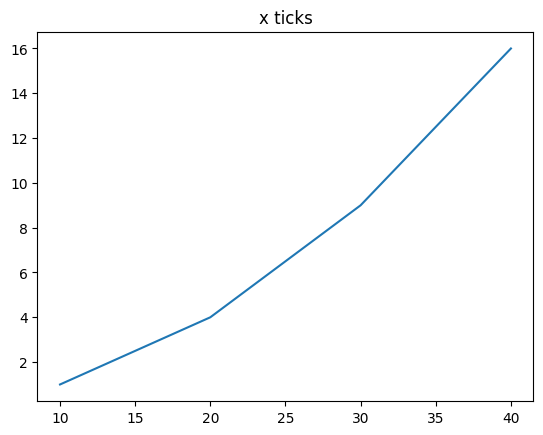

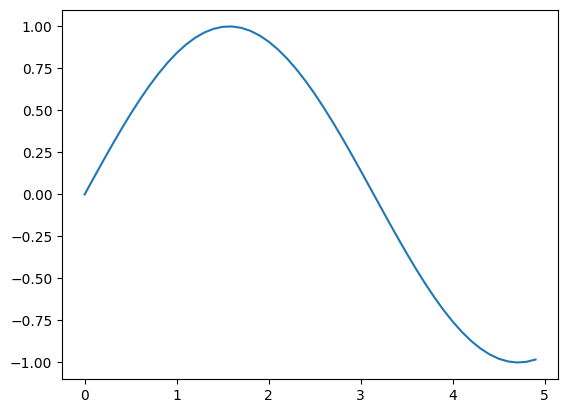

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

X = [1., 2., 3.]

W = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))

@tf.function
def forward(x1):
  return x1 * W + b
Y = forward(X)

print(Y)
plt.plot(X, Y, 'ro')
plt.plot(X,Y)
plt.show()

plt.title("Plot")
plt.plot([1, 4, 9, 16], 'ro')
plt.show();

plt.title("x ticks")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show();

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show();

a: 0.07721788502484031 b: 3.8034776437189497


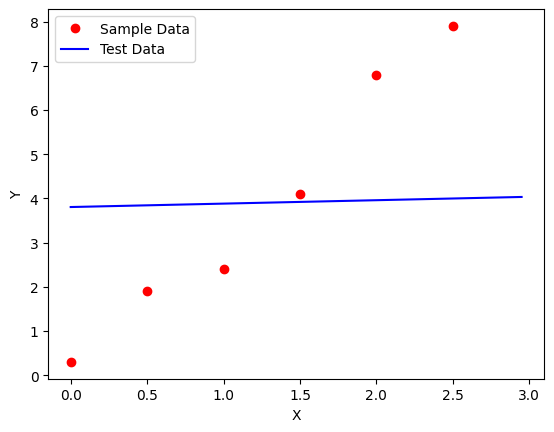

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 입력 샘플 데이터
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.8, 7.9]

# X, Y에 대한 평군 구하기
x_mean = sum(X)/len(X)
y_mean = sum(Y)/len(Y)

# 최소제곱법을 이용하여 a, b 꼐산하기
division = sum((y-y_mean)*(x-x_mean) for y, x in list(zip(Y,X)))
divisor = sum((x-x_mean)**2 for x in x)
a = division/divisor
b = y_mean - a * x_mean

# 그래프 그리기 위해 새로운 X값을 입력
new_X = np.arange(0, 3, 0.05)

# 선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a * new_X + b
# 화면에 그래프로 그리기
print('a:', a, 'b:', b)

plt.plot(X,Y,'ro',label='Sample Data')
plt.plot(new_X,new_Y,'b-',label='Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()